In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
file_path = '/content/ECOMM DATA.xlsx - Orders (1).csv'
df = pd.read_csv(file_path)


In [12]:
df.shape

(51290, 24)

In [13]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [14]:
boughts = df.groupby('Product Name').agg({'Quantity': 'sum'}).sort_values('Quantity',ascending=False)[:10]
boughts

,Quantity
Product Name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Cardinal Index Tab, Clear'),
  Text(2, 0, 'Eldon File Cart, Single Width'),
  Text(3, 0, 'Rogers File Cart, Single Width'),
  Text(4, 0, 'Sanford Pencil Sharpener, Water Color'),
  Text(5, 0, 'Stockwell Paper Clips, Assorted Sizes'),
  Text(6, 0, 'Avery Index Tab, Clear'),
  Text(7, 0, 'Ibico Index Tab, Clear'),
  Text(8, 0, 'Smead File Cart, Single Width'),
  Text(9, 0, 'Stanley Pencil Sharpener, Water Color')])

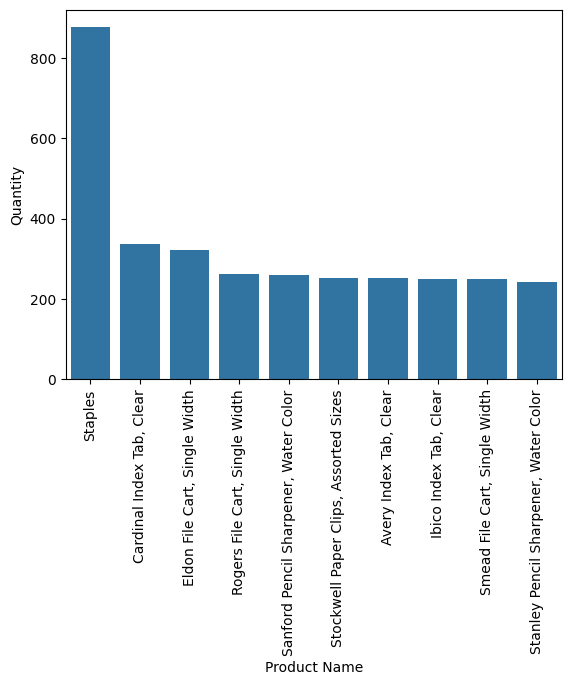

In [16]:
sns.barplot(x='Product Name',y='Quantity',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')

In [19]:
productSales = pd.DataFrame(df.groupby('Product Name').sum()['Sales'])
productSales.sort_values(by=['Sales'], inplace=True, ascending=False)
productSales.head(10)

,Sales
Product Name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [20]:
profitable_category = pd.DataFrame(df.groupby(['Category']).sum()['Profit'])
profitable_category.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_category

,Profit
Category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,285204.72380


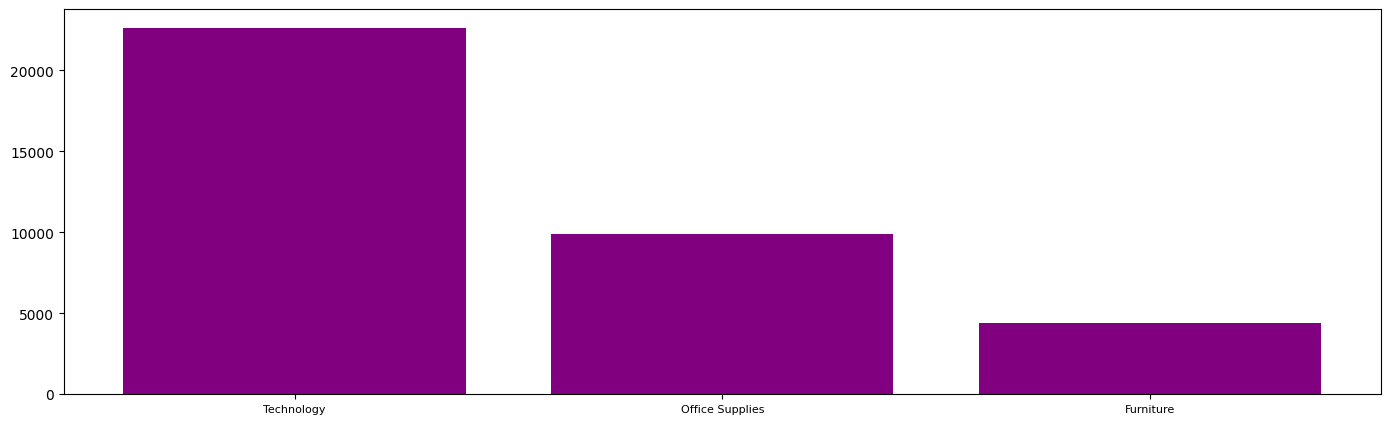

In [44]:
plt.figure(figsize=(17, 5))
plt.bar(df['Category'],df['Sales'],color = 'purple')
plt.xticks(size=8)
plt.show()

**Total** **sales**

In [22]:
df.groupby(['Category','Sub-Category']).sum()

Row ID  \
Category        Sub-Category              
Furniture       Bookcases      54830391   
                Chairs         79915221   
                Furnishings    84110487   
                Tables         22631821   
Office Supplies Appliances     46751657   
                Art           134705372   
                Binders       168636619   
                Envelopes      56221713   
                Fasteners      56876988   
                Labels         63118097   
                Paper          97085263   
                Storage       135263903   
                Supplies       56727112   
Technology      Accessories    79332919   
                Copiers        48446805   
                Machines       41730274   
                Phones         88973053   

                                                                       Order ID  \
Category        Sub-Category                                                      
Furniture       Bookcases     IN-2014-76016IN-2011-10286IN-2014-75470IT-2014...   
                Chairs        IN-2013-77878IN-2011-81826MX-2012-130015IN-201...   
                Furnishings   CA-2013-120369CA-2012-137974CA-2011-131002CA-2...   
                Tables        IN-2012-86369CA-2012-116638ID-2012-28402PL-201...   
Office Supplies Appliances    IN-2013-73951ES-2014-5099955ES-2014-1651774TZ-...   
                Art           ES-2014-2591706ES-2014-3898009IN-2014-58957ZA-...   
                Binders       CA-2014-135909CA-2011-116904US-2012-163825CA-2...   
                Envelopes     IN-2013-37929ES-2013-2569541ZA-2013-9740ES-201...   
                Fasteners     MZ-2014-140IN-2012-51551IN-2013-72740BU-2013-3...   
                Labels        CA-2012-134257CA-2014-108560CA-2013-163328UP-2...   
                Paper         CA-2014-114055CA-2011-140662SU-2011-1150CA-201...   
                Storage       CA-2011-106726CA-2011-119375ES-2011-3259196SF-...   
                Supplies      CA-2011-102988CA-2014-158379CA-2014-158729US-2...   
Technology      Accessories   CA-2012-124891CA-2014-143567IN-2013-77444MX-20...   
                Copiers       SG-2013-4320IN-2014-11763ES-2014-2637201IR-201...   
                Machines      ES-2012-5870268CA-2011-160766US-2014-168116IN-...   
                Phones        IN-2013-71249ES-2013-1579342IN-2013-42360SA-20...   

                                                                     Order Date  \
Category        Sub-Category                                                      
Furniture       Bookcases     26/9/201417/12/201111/3/20147/12/201428/10/201...   
                Chairs        5/2/20137/11/201113/11/20122/5/201125/2/201215...   
                Furnishings   29/10/201316/4/20127/9/201129/11/20142/11/2012...   
                Tables        14/4/201228/1/201219/4/20128/8/20125/9/201417/...   
Office Supplies Appliances    6/6/201331/7/20148/9/20145/12/201427/2/201314/...   
                Art           22/9/201424/1/201417/11/201419/1/201127/9/2013...   
                Binders       14/10/201423/9/201116/6/201216/3/201217/1/2014...   
                Envelopes     20/9/201311/9/201313/9/201325/7/201331/3/20142...   
                Fasteners     28/6/20145/6/201212/4/20132/4/201331/8/201328/...   
                Labels        16/3/20129/7/20145/11/20135/11/201431/10/20129...   
                Paper         26/12/201417/11/201130/8/20114/9/20144/12/2014...   
                Storage       6/12/201117/11/201113/10/201115/2/201120/9/201...   
                Supplies      5/4/201123/9/201420/12/201414/1/201426/12/2012...   
Technology      Accessories   31/7/20123/11/20147/11/20136/12/201213/5/20112...   
                Copiers       5/11/201331/1/201414/1/201418/9/201425/7/20143...   
                Machines      17/7/201214/9/20115/11/20141/5/20148/11/201229...   
                Phones        17/10/201328/1/201328/6/201327/12/201129/10/20...   

                                                           

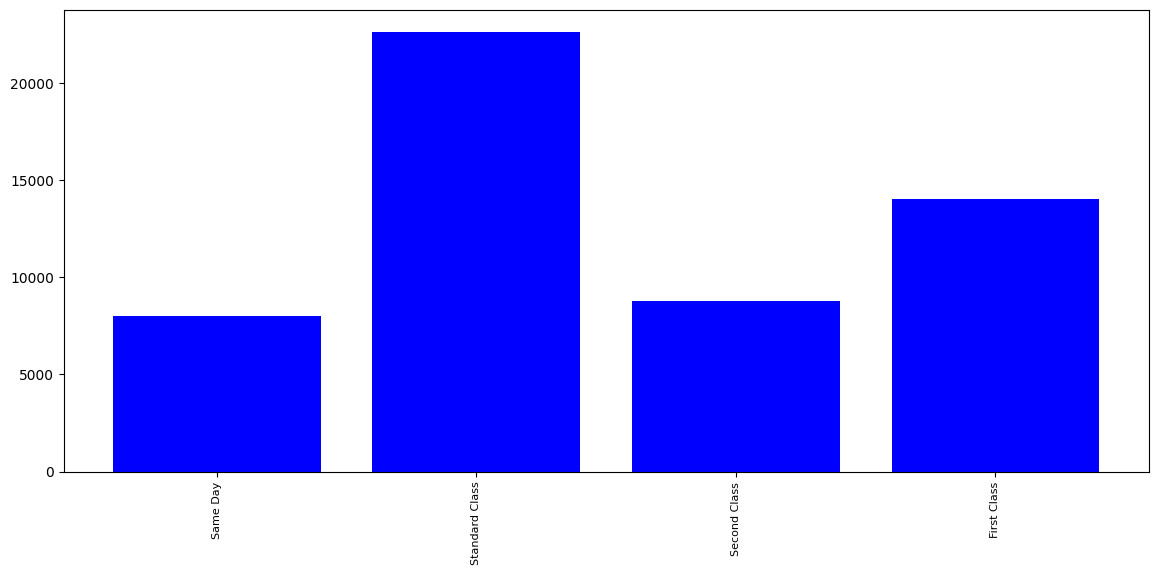

In [46]:
#whch ship mode is more profitable
plt.figure(figsize=(14, 6))
plt.bar(df['Ship Mode'],df['Sales'],color = 'b')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [24]:

total_sales = df['Sales'].sum()
total_sales

12642501.909880001

In [28]:
# Eliminate NaN values
df.dropna(inplace=True)

**MONTHLY AND YEARLY SALES TRENDS**

In [40]:
# Convert date columns to datetime format
df['OrderDate'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['ShipDate'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [39]:
# Group by month and sum the sales_amount for each month
monthly_sales = df.groupby(['OrderDate', 'ShipDate'])['Sales'].sum().reset_index()

# Find the month with the highest total sales
max_sales_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]

# Print the monthly sales data and the month with the highest sales
print("Monthly Sales Data:")
print(monthly_sales)

print("\nMonth with the Highest Sales:")
print(max_sales_month)

# Group by month and sum the sales_amount for each month
yearly_sales = df.groupby(['OrderDate', 'ShipDate'])['Sales'].sum().reset_index()

# Find the month with the highest total sales
max_sales_year = yearly_sales.loc[yearly_sales['Sales'].idxmax()]

# Print the monthly sales data and the month with the highest sales
print("Yearly Sales Data:")
print(yearly_sales)

print("\nYear with the Highest Sales:")
print(max_sales_year)

Monthly Sales Data:
      OrderDate   ShipDate    Sales
0    2011-01-04 2011-01-08   16.448
1    2011-01-05 2011-01-09  288.060
2    2011-01-06 2011-01-13   19.536
3    2011-01-07 2011-01-08   12.780
4    2011-01-07 2011-01-09   19.440
...         ...        ...      ...
3468 2014-12-30 2015-01-03  784.004
3469 2014-12-30 2015-01-05  209.700
3470 2014-12-30 2015-01-06  101.120
3471 2014-12-31 2015-01-04  504.490
3472 2014-12-31 2015-01-06  209.300

[3473 rows x 3 columns]

Month with the Highest Sales:
OrderDate    2011-03-18 00:00:00
ShipDate     2011-03-23 00:00:00
Sales                  23661.228
Name: 84, dtype: object
Yearly Sales Data:
      OrderDate   ShipDate    Sales
0    2011-01-04 2011-01-08   16.448
1    2011-01-05 2011-01-09  288.060
2    2011-01-06 2011-01-13   19.536
3    2011-01-07 2011-01-08   12.780
4    2011-01-07 2011-01-09   19.440
...         ...        ...      ...
3468 2014-12-30 2015-01-03  784.004
3469 2014-12-30 2015-01-05  209.700
3470 2014-12-30 2015-01-06

Monthly Sales Data:
   OrderDate        Sales
0    2011-01   13946.2290
1    2011-02    4810.5580
2    2011-03   55691.0090
3    2011-04   28295.3450
4    2011-05   23648.2870
5    2011-06   34595.1276
6    2011-07   33946.3930
7    2011-08   27909.4685
8    2011-09   81777.3508
9    2011-10   31453.3930
10   2011-11   78628.7167
11   2011-12   69545.6205
12   2012-01   18174.0756
13   2012-02   12210.8670
14   2012-03   38466.7960
15   2012-04   34195.2085
16   2012-05   30131.6865
17   2012-06   24797.2920
18   2012-07   28765.3250
19   2012-08   36898.3322
20   2012-09   64595.9180
21   2012-10   31404.9235
22   2012-11   75972.5635
23   2012-12   74919.5212
24   2013-01   18542.4910
25   2013-02   22867.7110
26   2013-03   51186.2170
27   2013-04   39248.5930
28   2013-05   56691.0770
29   2013-06   39430.4430
30   2013-07   38440.7550
31   2013-08   33265.5643
32   2013-09   72908.1089
33   2013-10   56463.1300
34   2013-11   82192.3228
35   2013-12   97237.4170
36   2014-01   447

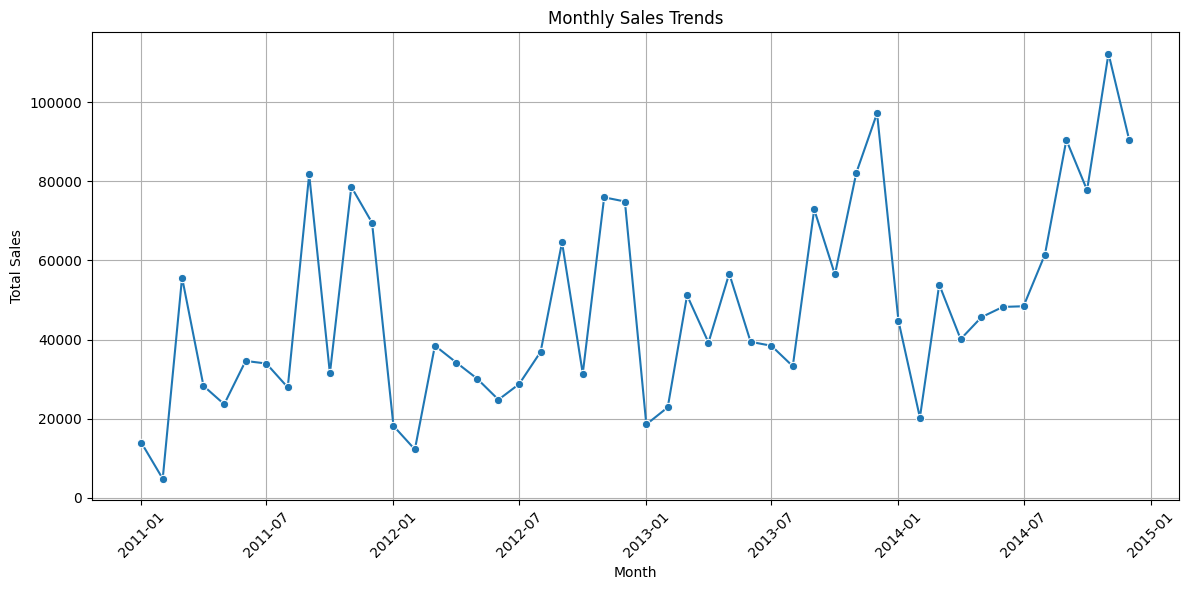

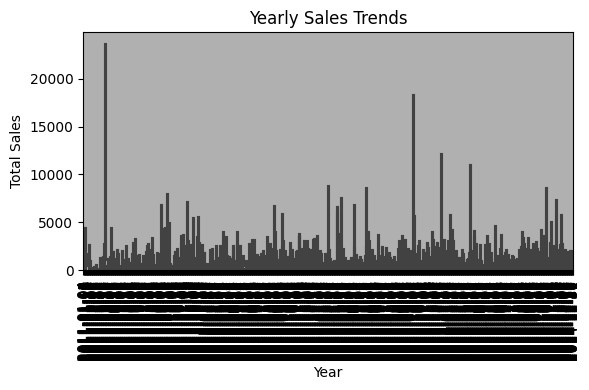

In [63]:

# Assuming df is already loaded and processed as per previous steps

# Group by month and sum the sales_amount for each month
monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M'))['Sales'].sum().reset_index()

# Find the month with the highest total sales
max_sales_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]

# Print the monthly sales data and the month with the highest sales
print("Monthly Sales Data:")
print(monthly_sales)

print("\nMonth with the Highest Sales:")
print(max_sales_month)

# Visualize Monthly Sales Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales['OrderDate'].dt.to_timestamp(), y=monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



# Visualize Yearly Sales Trends
plt.figure(figsize=(6, 4))
sns.barplot(x='OrderDate', y='Sales', data=yearly_sales)
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()




In [68]:
import pandas as pd

# Assuming df is already loaded and processed as per previous steps

# Ensure 'Sales', 'Quantity', and 'Profit' are numeric types (they should be based on previous steps)

# Best-Selling Products by Revenue
best_selling_products_revenue = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

# Best-Selling Products by Quantity
best_selling_products_quantity = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

# Most Profitable Products
most_profitable_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)

# Average Discount
average_discount = df['Discount'].mean()

# Average Shipping Cost
average_shipping_cost = df['Shipping Cost'].mean()

# Print results or perform further analysis
print("Best-Selling Products by Revenue:")
print(best_selling_products_revenue.head(10))  # Print the top 10 best-selling products by revenue

print("\nBest-Selling Products by Quantity:")
print(best_selling_products_quantity.head(10))  # Print the top 10 best-selling products by quantity

print("\nMost Profitable Products:")
print(most_profitable_products.head(10))  # Print the top 10 most profitable products

print(f"\nAverage Discount: {average_discount:.2f}")
print(f"Average Shipping Cost: {average_shipping_cost:.2f}")



Best-Selling Products by Revenue:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

Best-Selling Products by Quantity: